## GRIP - THE SPARKS FOUNDATION

### Data Science & Business Analytics Intern 

#### Task 5 : Exploratory Data Analysis - Sports
Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'. 
As a sports analysts, Find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products?

#### Author : Roopa Calistus

#### Importing all the required libraries

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

There are two datasets here. One dataset contains the details about the deliveries and the second dataset about the matches.

In [3]:
ddata = pd.read_csv('deliveries.csv')
mdata = pd.read_csv('matches.csv')

#### Visualizing the data

In [3]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
ddata.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
mdata.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
ddata.shape

(179078, 21)

In [8]:
mdata.shape

(756, 18)

#### Cleaning the data

In [10]:
ddata.drop('match_id', axis = 1, inplace = True)
ddata.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [11]:
mdata.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
ddata.isnull().sum()

inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [14]:
mdata.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### Removing duplicate values

In [15]:
ddata.duplicated().sum() 

398

In [16]:
mdata.duplicated().sum()

0

In [18]:
ddata.drop_duplicates(inplace = True) 
ddata.shape

(178680, 20)

#### Statistical information of the data

In [19]:
ddata.describe() 

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000
mean,1.483126,10.174429,3.616404,0.000453,0.036798,0.004947,0.021178,0.004192,0.000056,1.248293,0.067170,1.315463
std,0.502085,5.672996,1.806956,0.021287,0.251424,0.116609,0.195109,0.070571,0.016728,1.608918,0.342905,1.606003
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


##### Total number of innings of the matches played

In [20]:
ddata.inning.nunique() 

5

In [21]:
mdata.describe() 

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


##### How many IPL seasons are we using to analyse ?

In [22]:
mdata.season.nunique()

12

In [23]:
mdata.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

##### Total number of matches played according to the dataset

In [24]:
mdata['id'].count()

756

#### Which IPL team won by maximum runs?

In [28]:
mdata.iloc[mdata['win_by_runs'].idxmax()]['winner']


'Mumbai Indians'

#### Which IPL team won by minimum runs ?

In [33]:
mdata.iloc[mdata['win_by_runs'].idxmin()]['winner']

'Rising Pune Supergiant'

#### Which IPL team won by consuming maximum wickets?

In [31]:

mdata.iloc[mdata['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

#### Which IPL team won by consuming minimum wickets?

In [35]:
mdata.iloc[mdata['win_by_wickets'].idxmin()]['winner']


'Sunrisers Hyderabad'

From the above observations we can see that :
1. Mumbai Indians won by maximum runs.
2. Kolkata Knight Riders won by maximum wickets.
3. Rising PuneSupergiant won by minimum runs.
4. Sunrisers Hyderabad won by minimum wickets.

#### Which season consisted of the highest number of matches ever played ?

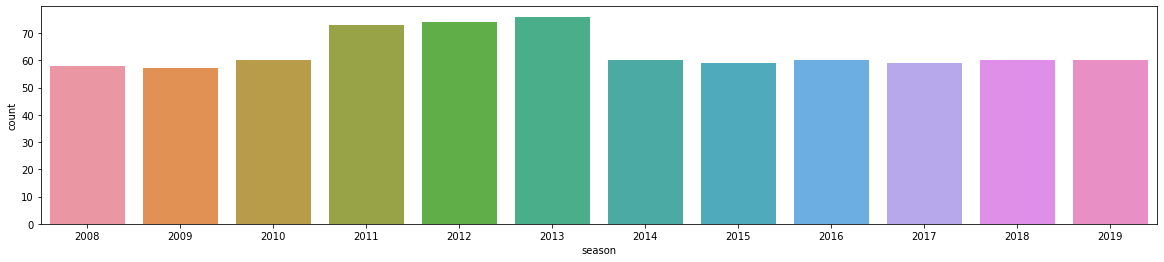

In [36]:
fig_dims = (20,4)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x='season', ax=ax, data=mdata)
plt.show()

Most matches were played in year 2013

#### Which is the most successful IPL team with all the data at hand?

<AxesSubplot:xlabel='winner'>

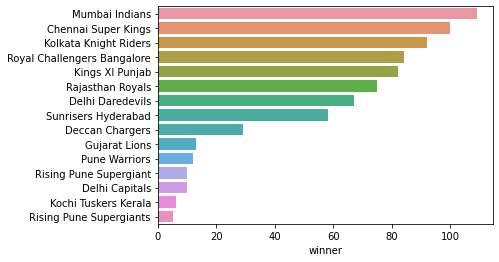

In [37]:

data1 = mdata.winner.value_counts()
sns.barplot(y = data1.index, x = data1)


Mumbai Indians has won the highest number of matches

#### Top players of winning matches

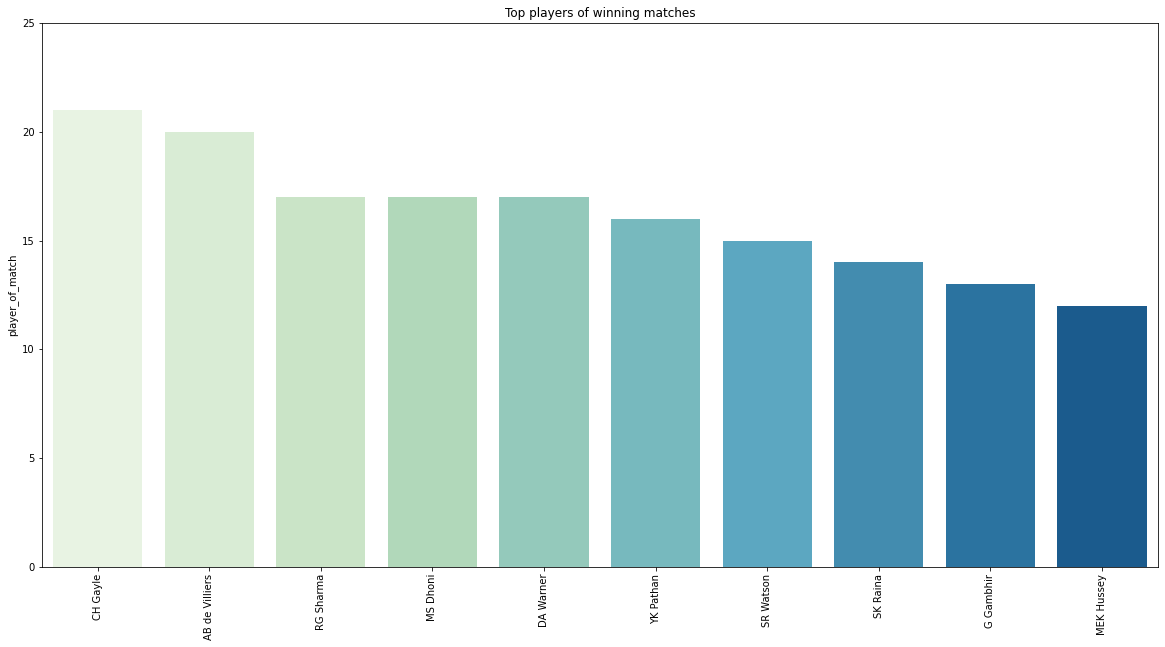

In [40]:


top = mdata.player_of_match.value_counts()[:10]
Fig, md = plt.subplots(figsize = (20, 10))

md.set_ylim([0,25])
md.set_ylabel("Count")
md.set_title("Top players of winning matches")

top.plot.bar()
sns.barplot(x = top.index, y = top, orient = 'v', palette = 'GnBu');
plt.show()

Chris Gayle is the most successful player in all the winning matches.

#### Matches according to venue

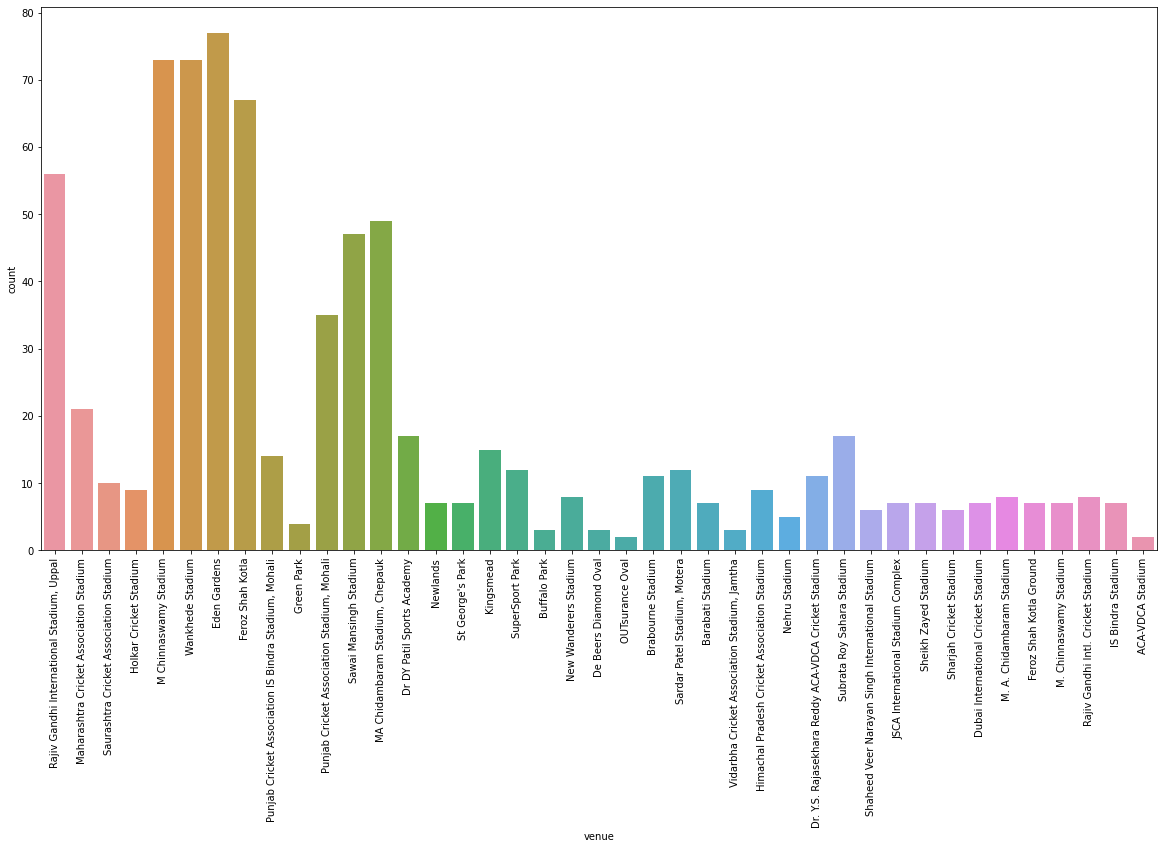

In [41]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'venue', data = mdata)
plt.xticks(rotation = 90)
plt.show()

The most number of matches were held at the Eden Gardens stadium followed by M Chinnaswamy Stadium and Wankhede Stadium.

#### The number of matches played by each team

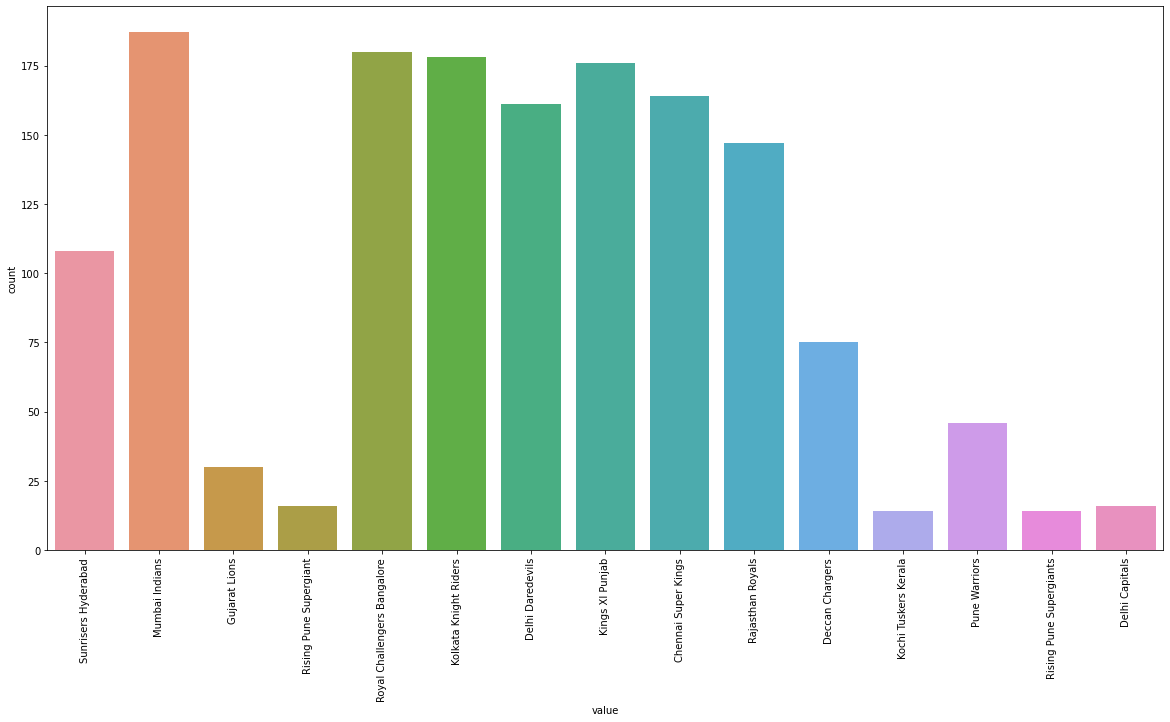

In [42]:
team_data = pd.melt(mdata, id_vars = ['id', 'season'], value_vars = ['team1', 'team2'])

plt.figure(figsize = (20, 10))
sns.countplot(x = 'value', data = team_data)
plt.xticks(rotation = 90)
plt.show()

Mumbai Indians has played the most number of matches followed by Royal Challengers Bangalore.

Teams like Rising Pune Supergiants, Gujarat Lions who joined in past few seasons have won only few matches.

Kochi Tuskers Kerala has played the least number of matches.


#### The winners in each Season


In [46]:

win_mdata = mdata.drop_duplicates(subset = ['season'], keep = 'last')[['season', 'winner']].reset_index(drop = True)
win_mdata

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


#### IPL Finals venues and winners along with the number of wins.

In [5]:
finals=mdata.drop_duplicates(subset=['season'], keep='last')
finals.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

#### The number of seasons won by each team

In [6]:
finals["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

#### The toss winner, toss decision, winner in final matches.

In [7]:
finals[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


#### The man of the match for each winning team

In [14]:

finals[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


#### Decision in every toss either fielding or batting

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


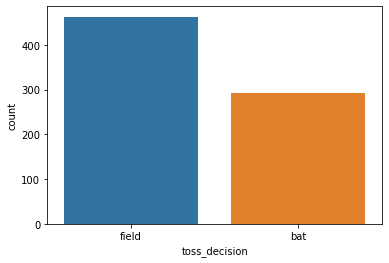

In [49]:

chart = sns.countplot(mdata['toss_decision'])


Mostly the teams will choose to field as they will have an advantage of knowing how many runs to chase later 


####  What is the probability of winning a match if the toss was won?


In [43]:

probability_of_win = mdata['toss_winner'] == mdata['winner']
probability_of_win.groupby(probability_of_win).size()


False    363
True     393
dtype: int64

##### False - Lost the toss but won the game
##### True - Won the toss but lost the game


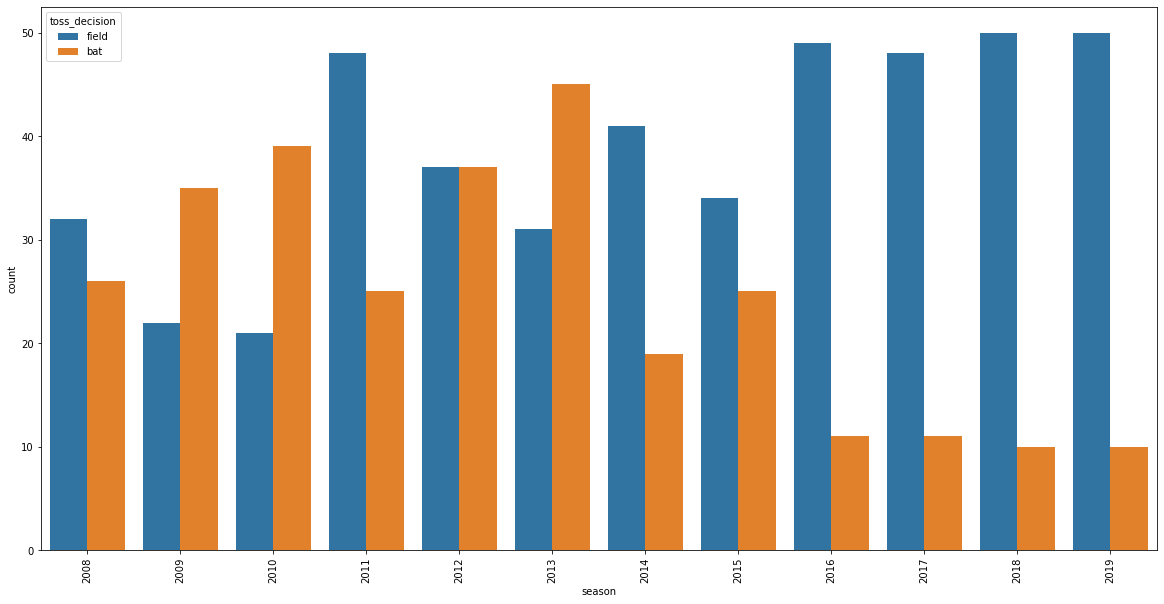

In [48]:
#Over Time Decision

plt.figure(figsize = (20, 10))
sns.countplot(x = 'season', hue ='toss_decision', data = mdata)
plt.xticks(rotation = 90)
plt.show()

In the beginning years of the IPL, decisions made by toss were to bat first. From 2016, the teams who won the toss have chosen to field first.

In [17]:
seasons=mdata[['id','season','winner']]

alldata=ddata.merge(seasons,how='inner',left_on='match_id',right_on='id')

#### The total runs by fours hit and the total number of fours hit by each team

In [18]:

fours=alldata[alldata['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


#### The fours hit by players

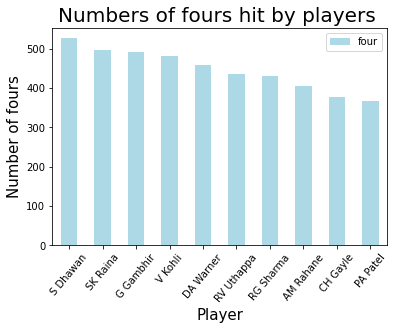

In [33]:

batsman_four=fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='lightblue')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player",fontsize=15)
plt.ylabel("Number of fours",fontsize=15)
plt.show()

#### The number of fours hit in each season

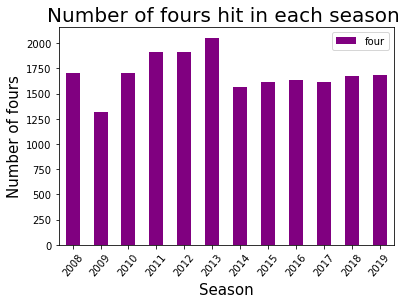

In [34]:

ax=fours.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'purple')
plt.title("Number of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Number of fours",fontsize=15)
plt.show()

#### The total runs by the sixes hit and the number of sixes hit by each team

In [35]:
six=alldata[alldata['batsman_runs']==6]
six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


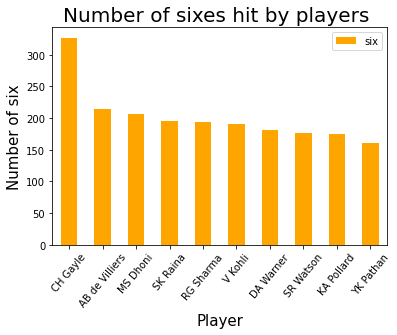

In [36]:
batsman_six=six.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='orange')
plt.title("Number of sixes hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player",fontsize=15)
plt.ylabel("Number of six",fontsize=15)
plt.show()

#### The number of sixes hit in each season

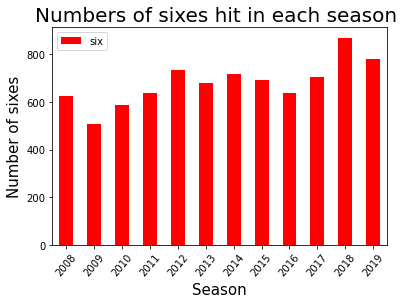

In [37]:

ax=six.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'red')
plt.title("Numbers of sixes hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Number of sixes",fontsize=15)
plt.show()

#### The top 10 leading run scorers in IPL

In [38]:

batsman_score=ddata.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score.iloc[:10,:]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [40]:
wicket_data=ddata.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


### Conclusion :

* Most matches were played in year 2013.
* Mumbai Indians has won the highest number of matches.
* Chris Gayle is the most successful player among all the winning matches.
* The most number of matches were held at the Eden Gardens stadium followed by M Chinnaswamy Stadium and Wankhede Stadium.
* Mumbai Indians has played the most number of matches followed by Royal Challengers Bangalore.
* Mostly the teams chose to field as they will have an advantage of knowing how many runs to chase later.
* In the beginning years of the IPL, decisions made by toss were to bat first. From 2016, the teams who won the toss have chosen to field first.
* Shikar Dhawan has hit the highest number of fours. 
* CH gayle has hit the highest number of sixes.
* Virat Kohli, S K Raina, R G Sharma are the top leading run scorers in IPL.
* S L Malinga is the bowler who has taken maximum number of wickets in IPL.
